# 🚀 ELEVVO Internship Task
#### 👤 Author: Ali Muhammed
#### 🧠 Task Level: 2
#### 🚀 Task Number: 3

## 🎬 Importing the tools and library

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

import warnings
warnings.filterwarnings("ignore")

import joblib

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\ali
[nltk_data]     mohamed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## 📂 Loading the data

In [3]:
true = pd.read_csv('True.csv')
true

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [4]:
fake = pd.read_csv('Fake.csv')
fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [5]:
true['label'] = 'true'
true

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",true
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",true
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",true
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",true


In [6]:
fake['label'] = 'fake'
fake

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",fake
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",fake
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",fake
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",fake


In [7]:
data = pd.concat([true, fake], ignore_index=True)
data

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",fake
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",fake
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",fake
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",fake


In [8]:
data.describe()

,title,text,subject,date,label
count,44898,44898,44898,44898,44898
unique,38729,38646,8,2397,2
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,"December 20, 2017",fake
freq,14,627,11272,182,23481


In [9]:
data['label'].value_counts()

label
fake    23481
true    21417
Name: count, dtype: int64

In [10]:
data.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [11]:
data.duplicated().sum()

209

In [12]:
data = data.drop_duplicates()
data.duplicated().sum()

0

## 🛑 Loading the stop words

In [13]:
stop_words = set(stopwords.words("english"))
print(stop_words)

{'other', 'with', 'we', "you're", 'i', 'didn', "it'll", 'now', 'ourselves', 'can', 'yours', "shan't", 'was', "it'd", 'here', 'during', 'mightn', "hasn't", 'some', 'before', 'against', "isn't", "aren't", 'theirs', 'above', 'an', 'hasn', "i'm", "mightn't", "doesn't", 'off', 'under', 've', 'she', 'having', 'on', 'such', 'by', 'are', 'is', "she's", 'couldn', "didn't", 'it', 'once', 'ain', 'shan', 'his', 'haven', 'through', 'her', 'been', 'or', 'yourselves', 'those', 'these', 'ma', 'itself', 'while', 'again', 'he', 'same', "they'd", "i'll", 'd', 'few', 'into', "you've", 'below', 'm', "couldn't", 'after', 'too', 'most', 'that', 't', "wouldn't", 'at', 'do', "they're", 'only', 'doing', "he'd", "they've", 'weren', 'me', 'their', 'more', 'herself', "he's", "that'll", 'wouldn', 'than', 'of', 'had', 'o', 'being', 'mustn', 'just', 'to', 'which', 'further', 'him', 'not', 'all', 'so', "should've", 'myself', "they'll", 'no', 'does', 'in', 'the', "we'll", 'as', 'if', "we're", 'any', "it's", 'over', 'yo

## 🧹 Preprocessing the data

In [14]:
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'\\"\\n""', ' ', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    words = text.split()
    return " ".join(lemmatizer.lemmatize(w) for w in words if w not in stop_words)

data["clean_text"] = data["text"].apply(preprocess_text)

In [15]:
data

,title,text,subject,date,label,clean_text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true,washington reuters head conservative republica...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true,washington reuters transgender people allowed ...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true,washington reuters special counsel investigati...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true,washington reuters trump campaign adviser geor...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true,seattle washington reuters president donald tr...
...,...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",fake,st century wire say wire reported earlier week...
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",fake,st century wire say familiar theme whenever di...
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",fake,patrick henningsen st century wireremember oba...
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",fake,st century wire say al jazeera america go hist...


## 🔀 Splitting the data (train and test)

In [16]:
train = data['clean_text']
test = data['label']

x_train, x_test, y_train, y_test = train_test_split(train, test, test_size=0.2, random_state=42)

## 📈 Converting text into numerical vectors (using TF-IDF)

In [17]:
vectorizer = TfidfVectorizer()
train_vec = vectorizer.fit_transform(x_train)
test_vec = vectorizer.transform(x_test)

## 🤖 Making the Logistic Regression (Classification) model

In [18]:
LR_model = LogisticRegression()
LR_model.fit(train_vec, y_train)

y_pred = LR_model.predict(test_vec)

print("Accuracy :",f'{accuracy_score(y_test, y_pred):.3%}')
print("Confusion Matrix :\n",confusion_matrix(y_test, y_pred))
print("F1 Score :",f"{f1_score(y_test, y_pred, pos_label='true'):.3%}")
print("Classification Report :\n",classification_report(y_test, y_pred))

Accuracy : 98.367%
Confusion Matrix :
 [[4582   66]
 [  80 4210]]
F1 Score : 98.296%
Classification Report :
               precision    recall  f1-score   support

        fake       0.98      0.99      0.98      4648
        true       0.98      0.98      0.98      4290

    accuracy                           0.98      8938
   macro avg       0.98      0.98      0.98      8938
weighted avg       0.98      0.98      0.98      8938



## 💾 Saving the model and vectorizer

In [19]:
joblib.dump(LR_model, 'fake_news_model.joblib')

joblib.dump(vectorizer, 'fake_news_vectorizer.joblib')

print("Model and vectorizer saved using joblib!")

Model and vectorizer saved using joblib!


## 📊 Visualizing the distribution of Fake and Real News

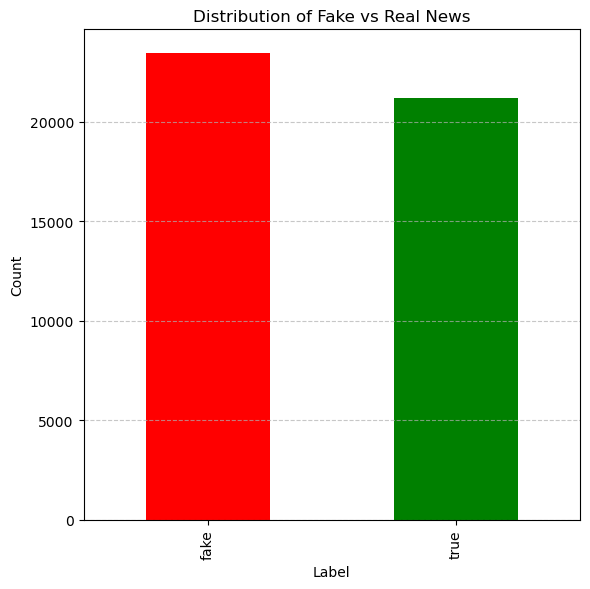

In [20]:
label_counts = data['label'].value_counts()
plt.figure(figsize=(6, 6))
label_counts.plot(kind='bar', color=['red', 'green'])
plt.title("Distribution of Fake vs Real News")
plt.xlabel("Label")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 📊 Visualizing the most common words

In [21]:
def visualize(x_train, y_train, classification, count, color, title):
    index = x_train[y_train[y_train == classification].index]
    index = " ".join(index).split()
    words_list = Counter(index).most_common(count)
    words = []

    for i in words_list:
        words.append(i[0])

    wordcloud = WordCloud(width=600, height=400, background_color=color).generate(" ".join(words))

    plt.figure(figsize=(15, 15))
    plt.axis('off')
    plt.title(title)
    plt.imshow(wordcloud, interpolation="Bilinear")

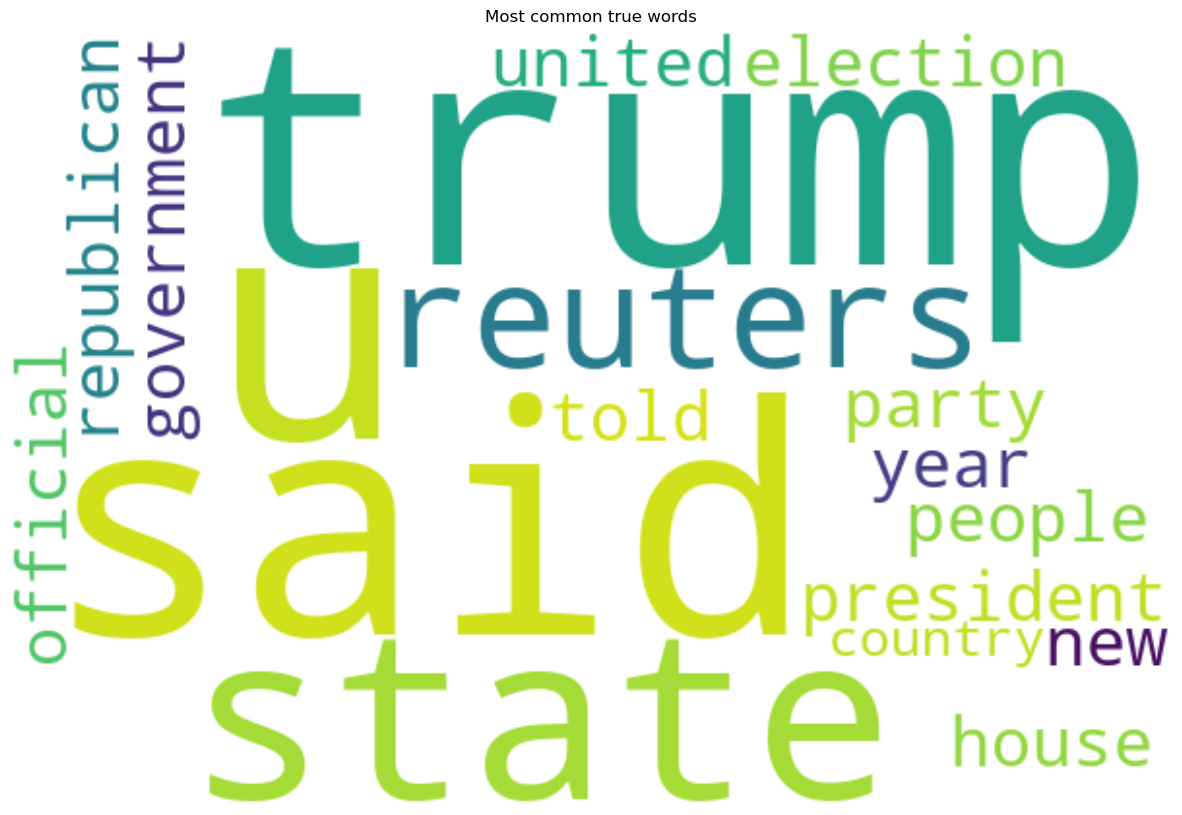

In [22]:
visualize(x_train, y_train, 'true', 20, 'white', 'Most common true words')

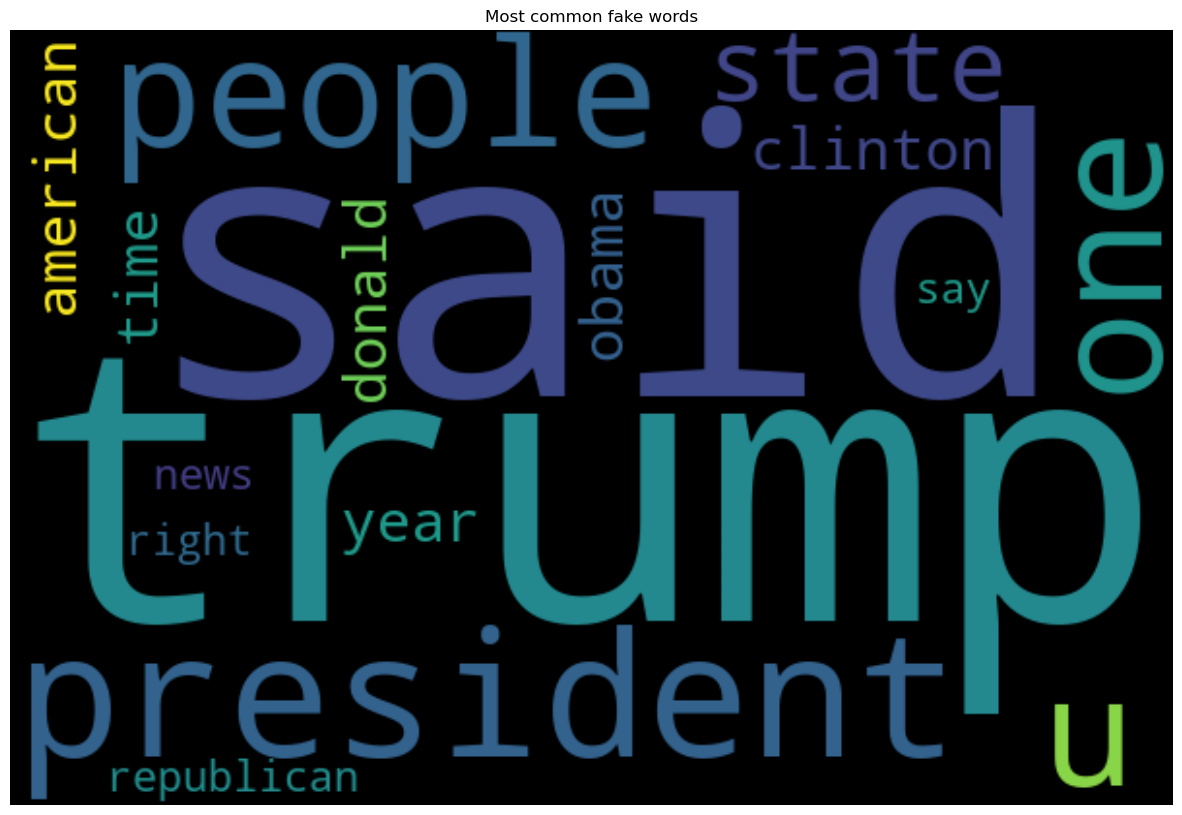

In [23]:
visualize(x_train, y_train, 'fake', 20, 'black', 'Most common fake words')

## 👤 Accounts
### [Linkedin](https://www.linkedin.com/in/ali-muhammed-salah/) [Kaggle](https://www.kaggle.com/alimuhammed10) [GitHub](https://github.com/ali-muhammed-salah)